In [1]:
#bu yazıda 5 temel morfolojik operasyona bakıcaz.

In [2]:
#1 - Erozyon: Temel fikri sadece toprak erozyonu gibidir, on plandaki nesnenin sınırlarını asindirir.
#nesnenin sınırları kuculuk, asindirilir

In [3]:
#2 - Genisleme: Erozyonun tam tersidir. Goruntudeki beyaz bolgeyi artırır.

In [4]:
#3 - Acma: erozyon + genisleme'dir ikisinin ard arda kullanılmasıdır.
#ikisini ard arda kullanmak neden onemli neden boyle bir yontem var: cunku ege resmin uzerinde gurultu varsa
#gurultunun giderilmesine yardımcı olur.

In [5]:
#4 - Kapatma: Acma isleminin tam tersidir. Once genisleme ardından erozyon yapılır yani: genisleme + erozyon yapılır.
#on plandaki nesnelerin icindeki kucuk delikleri veya siyah noktaları kapatmada etkilidir.

In [6]:
#5 - Morfolojik Gradyan: bir goruntunun genislemesi ve erozyonu arasındaki farktır yani:
#Goruntuyu once genislettigimizi sonrasında da o genislemis goruntuye erozyon uyguladıgımızda ve bu ikisinin farkını 
#aldıgımızda elde ettigimiz sonuc morfolojik gradyandır. 
#goruntude ortada siyah bosluklar meydana gelir.

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Original Pic'))

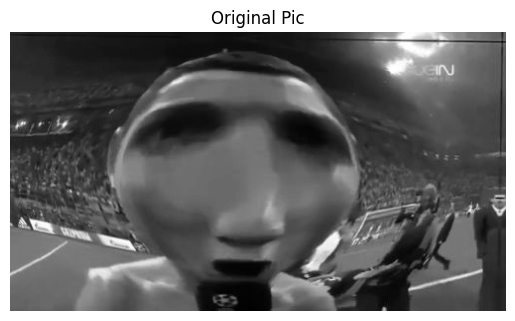

In [12]:
#resim ice aktarma
img = cv2.imread("ronaldo.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off"), plt.title("Original Pic")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Erozyon Pic'))

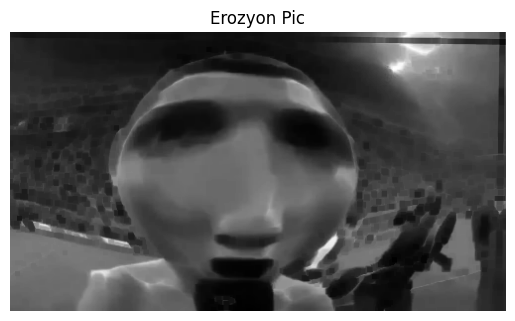

In [13]:
#erozyon. burada sınırlarımızı kucultuyorduk, bunun icin bir ktuuck belirleyecez ve kutucuk resim ustunde dolasacak.
#kutucugumuza kernel diyoruz.
kernel = np.ones((5,5), dtype=np.uint8)
result = cv2.erode(img, kernel, iterations = 1)   
#erozyon fonksıyonu erode, ve bunu resme uyguluyoruz. kerneli cagırıyoruz ve iterasyon ise kac kere erozyon yapılacak = 1 dedik.
plt.figure(), plt.imshow(result, cmap = "gray"), plt.axis("off"), plt.title("Erozyon Pic")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Genisleme Pic'))

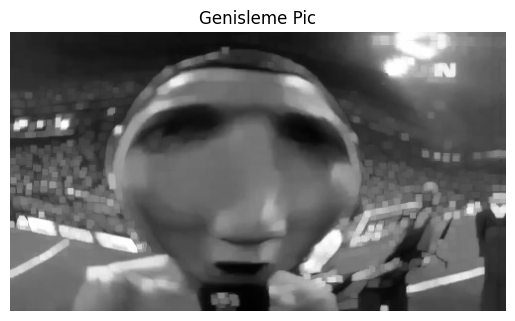

In [14]:
#simdi genisleme yapıcaz - > dilation
result2 = cv2.dilate(img, kernel, iterations = 1)
plt.figure(), plt.imshow(result2, cmap = "gray"), plt.axis("off"), plt.title("Genisleme Pic")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'With White Noise'))

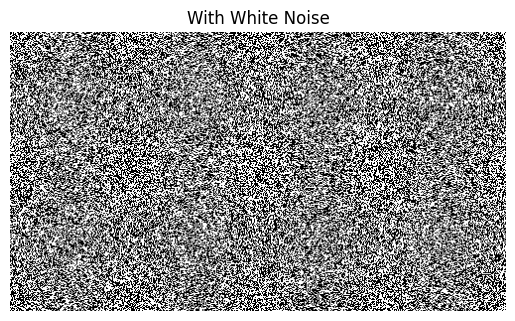

In [15]:
#simdi acılma yapıcaz ama acılmayı neden yapıyoruz? beyaz gurultuyu onlemek icin yapıyoruz
#onun icin simdi bi beyaz gurultu olusturucaz.

#white noise
whiteNoise = np.random.randint(0,2,size = img.shape[:2])  #burada 0 dahil 2 dahil degil yani 0 1 arası random olusturduk.
whiteNoise = whiteNoise*255   #burada ise 255 ile carparak 0 1 arasındakileri 255 scalasına uyarladım.
plt.figure(), plt.imshow(whiteNoise, cmap = "gray"), plt.axis("off"), plt.title("With White Noise")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'White Noise Pic'))

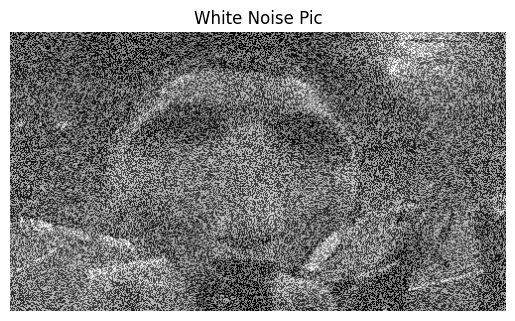

In [16]:
#simdi nabıcaz bu gurultuyu orijinal resmimizin ustune ekliyecez ve noisy bir resim elde edicez.
noise_img = whiteNoise + img
plt.figure(), plt.imshow(noise_img, cmap = "gray"), plt.axis("off"), plt.title("White Noise Pic")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Acilma'))

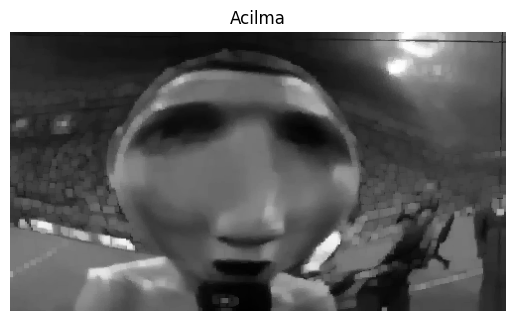

In [17]:
#acılma islemi yapıcaz simdi de. bu noise ımızı acılma yontemı ile ortadan kaldırıcaz.
opening = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)
plt.figure(), plt.imshow(opening, cmap = "gray"), plt.axis("off"), plt.title("Acilma")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'With Black Noise'))

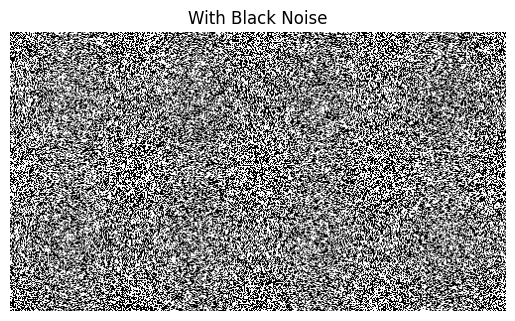

In [19]:
#simdi kapatmayı yapıcaz ama kapatmayı elde edebilmek icin bir noise a ihtiyacımız var
#bu sefer de beyazın tersi siyahı elde etmemiz gerekli. bu da cok kolay. usttekı 255 ile carptıgımızı -255 yapıcaz.

#black noise
blackNoise = np.random.randint(0,2,size = img.shape[:2])
blackNoise = blackNoise*-255
plt.figure(), plt.imshow(blackNoise, cmap = "gray"), plt.axis("off"), plt.title("With Black Noise")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Black Noise Img'))

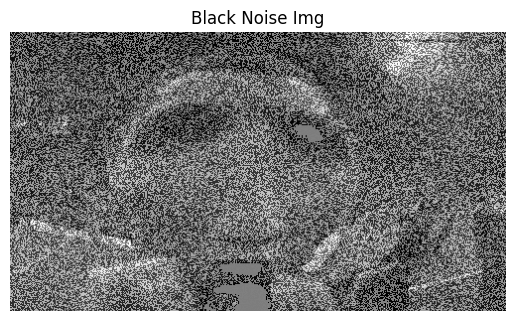

In [20]:
#resmimizin ustune black noise ekliyoruz.
black_noise_img = blackNoise + img
black_noise_img[black_noise_img <= -245] = 0
plt.figure(), plt.imshow(black_noise_img, cmap = "gray"), plt.axis("off"), plt.title("Black Noise Img")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Closing'))

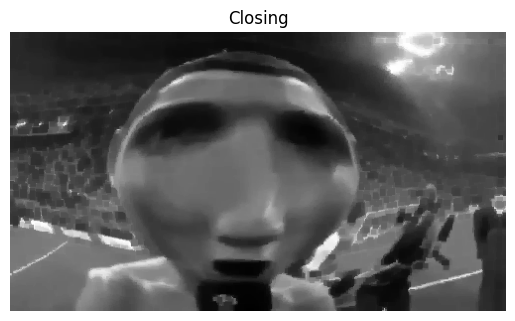

In [21]:
#simdi black noise ımızı ekledik artık kapatma ile black noise ımızdan kurtulabiliriz.
closing = cv2.morphologyEx(black_noise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)
plt.figure(), plt.imshow(closing, cmap = "gray"), plt.axis("off"), plt.title("Closing")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 499.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Gradient'))

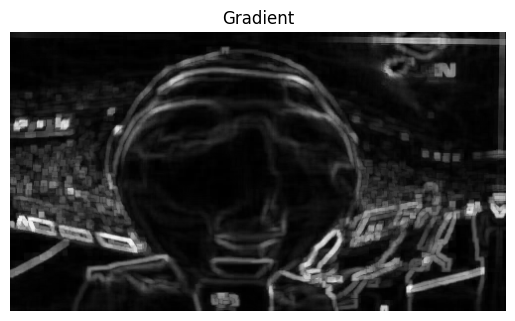

In [22]:
#simdi morfolojical gradient yapıcaz. yani genislemeyle erozyon farkını alıcaz.

#gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)  #orjinal remimizi kullandık. astype a gerek yok.
plt.figure(), plt.imshow(gradient, cmap = "gray"), plt.axis("off"), plt.title("Gradient")

In [23]:
#bunu yaptık ama ne isimize yaradı?
#bu gradient aslında nedir bir kenar tespitine yarar. ilerleyen bolumlerde nesne tespitinde ogrenecegimiz en temel seydir.